<a href="https://colab.research.google.com/github/r-vikrantsagar/NLP_Projects/blob/main/TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Generation of Poems.
Using word vector embeddings and LSTM Neural Network model.

NOTE:- Before executing the program, change your Runtime settings.

Go to : Runtime -> Change Runtime type -> Hardware accelarator -> GPU

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
poems = open('/content/drive/MyDrive/poems.txt', 'r').read()

In [ ]:
poems = pd.read_csv('/content/drive/MyDrive/songDataset/Gutenberg-Poetry.csv')

In [ ]:
for i in range(24,40):
  print(poems['s'][i])

"Wah-wah-taysee, little fire-fly,
Little, flitting, white-fire insect
Little, dancing, white-fire creature,
Light me with your little candle,
Ere upon my bed I lay me,
Ere in sleep I close my eyelids!"
Should you ask me, whence these stories?
Whence these legends and traditions,
With the odors of the forest
With the dew and damp of meadows,
With the curling smoke of wigwams,
With the rushing of great rivers,
With their frequent repetitions,
And their wild reverberations
As of thunder in the mountains?
I should answer, I should tell you,


In [ ]:
poems.drop(columns=['Unnamed: 0', 'gid'], inplace=True)
poems.drop(poems.head(24).index, inplace=True)
# for i in range(24):
#   poems.drop(i, axis=0, inplace=True)

In [ ]:
poems.drop(poems.tail(3065093).index, inplace=True)
poems.head()

,s
24,"""Wah-wah-taysee, little fire-fly,"
25,"Little, flitting, white-fire insect"
26,"Little, dancing, white-fire creature,"
27,"Light me with your little candle,"
28,"Ere upon my bed I lay me,"


In [ ]:
poems.shape

(20000, 1)

In [ ]:
print(poems)

I wandered lonely as a cloud
That floats on high o'er vales and hills,
When all at once I saw a crowd,
A host, of golden daffodils;
Beside the lake, beneath the trees,
Fluttering and dancing in the breeze.
Continuous as the stars that shine
And twinkle on the milky way,
They stretched in never-ending line
Along the margin of a bay:
Ten thousand saw I at a glance,
Tossing their heads in sprightly dance.
The waves beside them danced; but they
Out-did the sparkling waves in glee:
A poet could not but be gay,
In such a jocund company:
I gazed—and gazed—but little thought
What wealth the show to me had brought:
For oft, when on my couch I lie
In vacant or in pensive mood,
They flash upon that inward eye
Which is the bliss of solitude;
And then my heart with pleasure fills,
And dances with the daffodils.
Whose woods these are I think I know.   
His house is in the village though;   
He will not see me stopping here   
To watch his woods fill up with snow.   
My little horse must think it que

In [ ]:
poems.info

<bound method DataFrame.info of                                                    s
24                 "Wah-wah-taysee, little fire-fly,
25               Little, flitting, white-fire insect
26             Little, dancing, white-fire creature,
27                 Light me with your little candle,
28                         Ere upon my bed I lay me,
...                                              ...
20019       Me disobeys, breaks union, and that day,
20020    Cast out from God and blessed vision, falls
20021  Into utter darkness, deep ingulfed, his place
20022      Ordained without redemption, without end.
20023    So spake the Omnipotent, and with his words

[20000 rows x 1 columns]>

In [ ]:
import itertools
corpus = poems['s'].to_list()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(corpus[0:5])
print(dict(itertools.islice(tokenizer.word_index.items(),5)))
print(total_words)

['"Wah-wah-taysee, little fire-fly,', 'Little, flitting, white-fire insect', 'Little, dancing, white-fire creature,', 'Light me with your little candle,', 'Ere upon my bed I lay me,']
{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'in': 5}
12816


In [ ]:
corpus = poems.lower().split("\n")
# corpus = poems['s'].to_list()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(corpus)
print(tokenizer.word_index)
print(total_words)

['i wandered lonely as a cloud', "that floats on high o'er vales and hills,", 'when all at once i saw a crowd,', 'a host, of golden daffodils;', 'beside the lake, beneath the trees,', 'fluttering and dancing in the breeze.', 'continuous as the stars that shine', 'and twinkle on the milky way,', 'they stretched in never-ending line', 'along the margin of a bay:', 'ten thousand saw i at a glance,', 'tossing their heads in sprightly dance.', 'the waves beside them danced; but they', 'out-did the sparkling waves in glee:', 'a poet could not but be gay,', 'in such a jocund company:', 'i gazed—and gazed—but little thought', 'what wealth the show to me had brought:', 'for oft, when on my couch i lie', 'in vacant or in pensive mood,', 'they flash upon that inward eye', 'which is the bliss of solitude;', 'and then my heart with pleasure fills,', 'and dances with the daffodils.', 'whose woods these are i think i know.   ', 'his house is in the village though;   ', 'he will not see me stopping he

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer= 'RMSprop',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           1281600   
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 6408)              647208    
                                                                 
 dense_1 (Dense)             (None, 12816)             82137744  
                                                        

Since the training of the model can take a bit time and all that bs, i have added some additional code for you so that in case you get bored or you don't want to lose the training you did for this model then just execute the codes after this cell.. either stopping this cell or once you have trained the model and then you want to resume where you left off.

In [ ]:
#execute this cell if you are training for the first time
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
  75/3833 [..............................] - ETA: 1:00:12 - loss: 8.2457 - accuracy: 0.0487

KeyboardInterrupt: ignored

In [ ]:
#execute this cell for saving your progress after either
# a) You completely trained the model and want to save the progress in case you come back and don't want to retrain again
# or b) You got tired of waiting and just stopped the previous cell midway
model.save("/content/gdrive/MyDrive/TextGenModel")

In [ ]:
#execute this cell to load your trained model/half-trained model
resumedModel = keras.models.load_model("/content/gdrive/MyDrive/TextGenModel")

In [ ]:
#execute this cell if you want to continue your training
history = resumedModel.fit(predictors, label, validation_split=0.1, epochs=100, verbose=1)

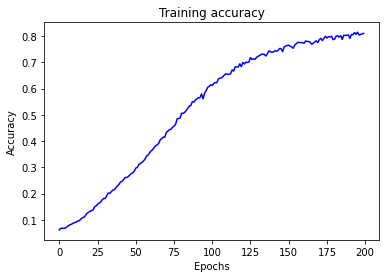

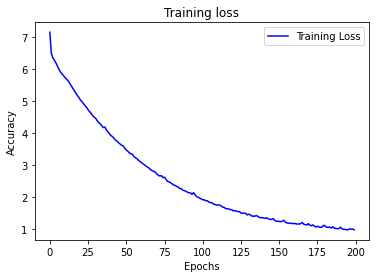

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

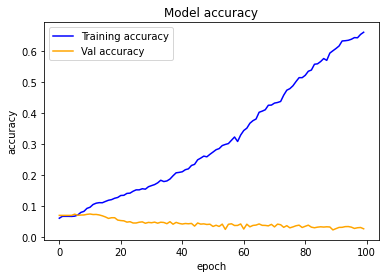

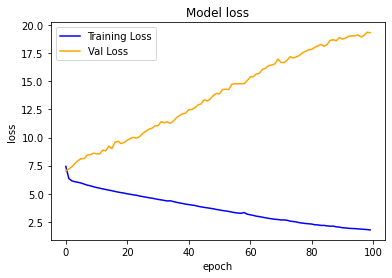

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy', color = 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss', color = 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [ ]:
seed_text = "Where the mind is without fear"
next_words = 110

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

seed_text = seed_text.split()
n = 6
[' '.join(seed_text[i:i+n]) for i in range(0,len(seed_text),n)]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


['Where the mind is without fear',
 'ground a million drops or killing',
 "ulterior loud you bugles blow sail's",
 'shaking began and wished no better',
 'mirth or to not free speech',
 'to must as they preach facing',
 'successful you are god nothing to',
 'not not not people do not',
 'thump summer to boy too far',
 'began and drums—so shine bedot her',
 'mountain walls that comets breathing in',
 'me as they god lies you',
 'things o happy throng pipes is',
 'the smallest minds shine leisure that',
 'mournful song is the smallest men',
 'and finished you can wash your',
 'hands and pray to here their',
 'hook sans gills seen or thread',
 "whores loud you bugles blow sail's",
 'shaking hall']

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive
